In [1]:
%matplotlib inline
import matplotlib
import altair as alt
import pandas as pd
from vega_datasets import data
from ipywidgets import interact, interactive, fixed, interact_manual
from IPython.display import display
import ipywidgets as widgets

# Allows to use a larger dataset to create a chart with
alt.data_transformers.enable('json')
# Set global figure size
matplotlib.rcParams['figure.figsize'] = (20.0, 10.0)

# for the notebook only (not for JupyterLab) run this command once per session
alt.renderers.enable('notebook')

iris = data.iris()

In [2]:
iris.head()

,petalLength,petalWidth,sepalLength,sepalWidth,species
0,1.4,0.2,5.1,3.5,setosa
1,1.4,0.2,4.9,3.0,setosa
2,1.3,0.2,4.7,3.2,setosa
3,1.5,0.2,4.6,3.1,setosa
4,1.4,0.2,5.0,3.6,setosa


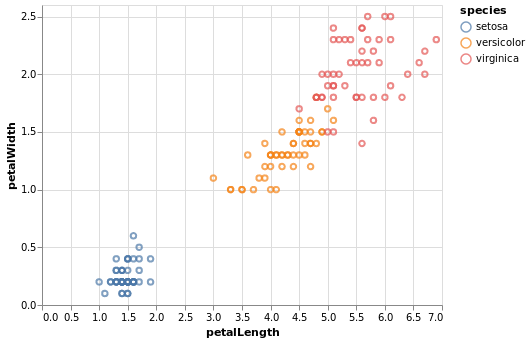

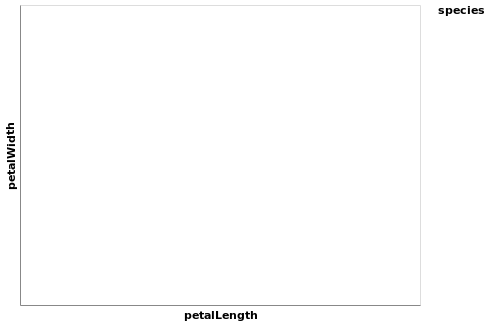

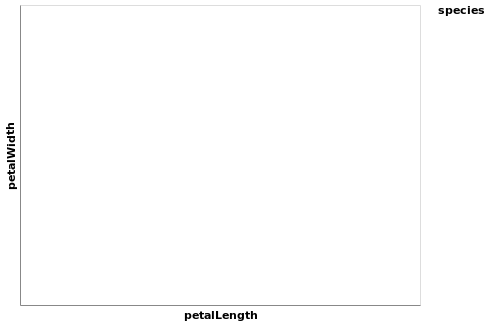

In [3]:
alt.Chart(iris).mark_point().encode(
    x='petalLength',
    y='petalWidth',
    color='species'
)

In [4]:
cars = data.cars()

In [5]:
cars.head()

,Acceleration,Cylinders,Displacement,Horsepower,Miles_per_Gallon,Name,Origin,Weight_in_lbs,Year
0,12.0,8,307.0,130.0,18.0,chevrolet chevelle malibu,USA,3504,1970-01-01
1,11.5,8,350.0,165.0,15.0,buick skylark 320,USA,3693,1970-01-01
2,11.0,8,318.0,150.0,18.0,plymouth satellite,USA,3436,1970-01-01
3,12.0,8,304.0,150.0,16.0,amc rebel sst,USA,3433,1970-01-01
4,10.5,8,302.0,140.0,17.0,ford torino,USA,3449,1970-01-01


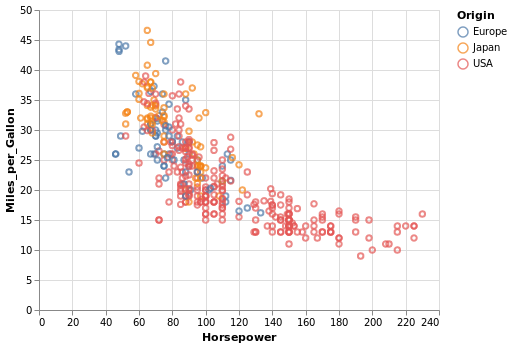

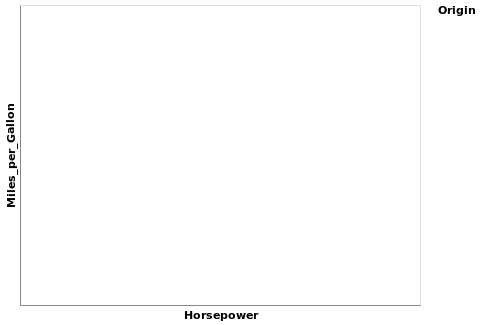

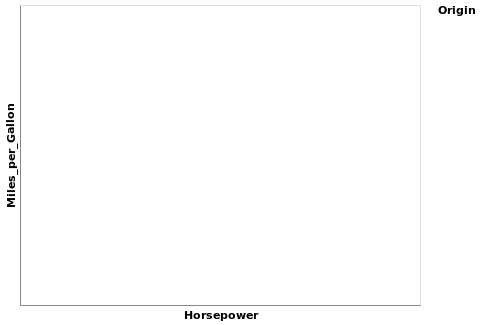

In [6]:
alt.Chart(cars).mark_point().encode(
    x='Horsepower',
    y='Miles_per_Gallon',
    color='Origin',
)

In [7]:
df = pd.read_csv('KOHSIDNE4_weather_cleaned.csv', parse_dates=['Time'], index_col=[0])

In [8]:
df.head()

,TemperatureF,Station
Time,,
2017-05-01 00:04:00,69.8,KOHSIDNE4
2017-05-01 00:09:00,69.6,KOHSIDNE4
2017-05-01 00:15:00,69.0,KOHSIDNE4
2017-05-01 00:21:00,68.6,KOHSIDNE4
2017-05-01 00:26:00,68.6,KOHSIDNE4


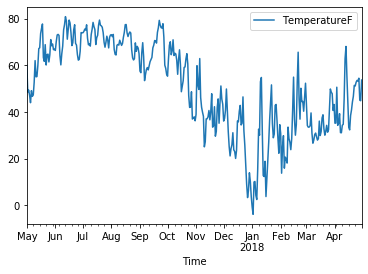

In [9]:
df.resample('D').mean().plot();

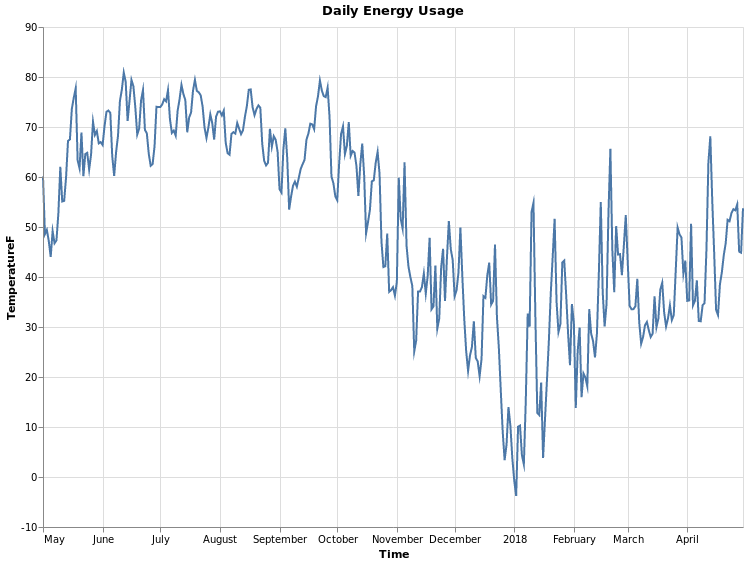

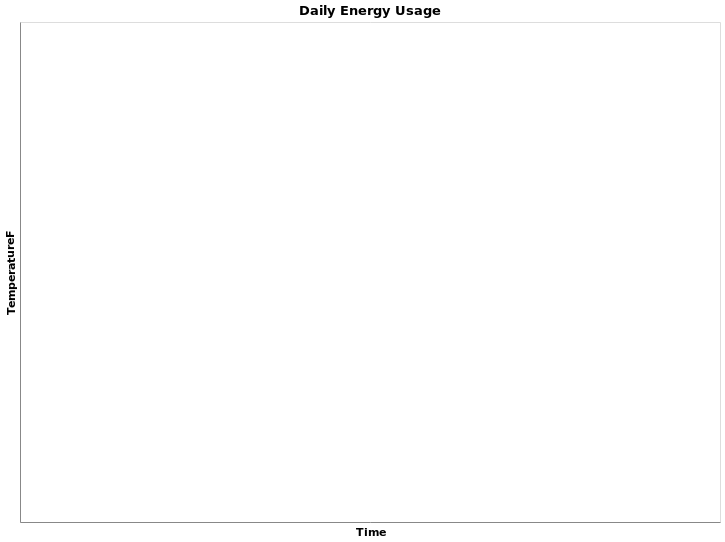

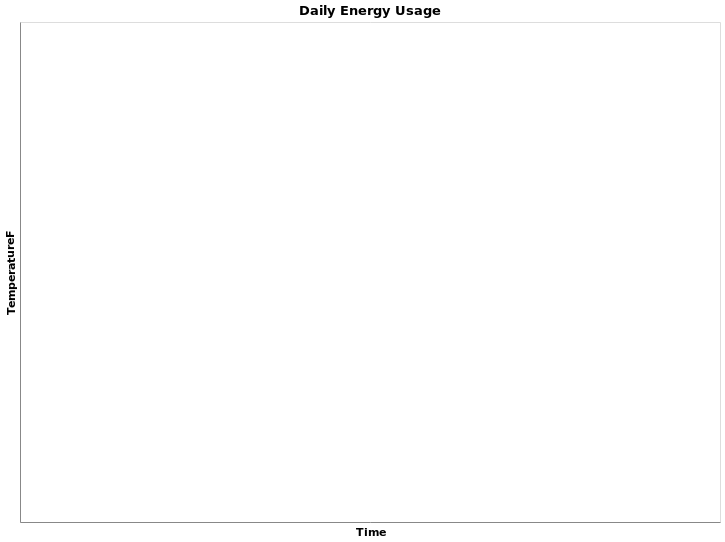

In [10]:
alt.Chart(df.resample('D').mean().reset_index(), height=500, width=700, title='Daily Energy Usage') \
    .mark_line().encode(
        x='Time',
        y='TemperatureF'
)

In [11]:
# Building a Python list using list comprehension syntax
month_list = [month[:7] for month in df.resample('M').sum().index.astype(str)]

In [12]:
month_list

['2017-05',
 '2017-06',
 '2017-07',
 '2017-08',
 '2017-09',
 '2017-10',
 '2017-11',
 '2017-12',
 '2018-01',
 '2018-02',
 '2018-03',
 '2018-04']

### Using ipywidgets

In [13]:
label_all = widgets.HTML(
    value="<b>All Data:</b>"
)
display(label_all)

@interact
def all(interval=['H','D','W'], aggfunc=['mean','none']):
    if aggfunc == 'mean':
        chart =  alt.Chart(df.resample(interval).mean().reset_index(), height=500, width=1000, title='Sidney, OH Temperatures (F)') \
                    .mark_line().encode(
                        x='Time',
                        y='TemperatureF',
                        opacity=alt.value(0.7)
                    )
    else:
        chart =  alt.Chart(df.reset_index(), height=500, width=1000, title='Sidney, OH Temperatures (F)') \
                    .mark_line().encode(
                        x='Time',
                        y='TemperatureF',
                        opacity=alt.value(0.7)
                    )
    return chart


label_bymonth = widgets.HTML(
    value="<b>By Month:</b>"
)
display(label_bymonth)
@interact
def byMonth(month=month_list, interval=['H','D','W'], aggfunc=['mean','none']):
    if aggfunc == 'mean':
        chart =  alt.Chart(df.loc[month].resample(interval).mean().reset_index(), height=500, width=900, title='Sidney, OH Temperatures (F)') \
                    .mark_line().encode(
                        x='Time',
                        y='TemperatureF',
                        opacity=alt.value(0.7)
                    )
    else:
        chart =  alt.Chart(df.loc[month].reset_index(), height=500, width=900, title='Sidney, OH Temperatures (F)') \
                    .mark_line().encode(
                        x='Time',
                        y='TemperatureF',
                        opacity=alt.value(0.7)
                    )
    return chart

HTML(value='<b>All Data:</b>')

interactive(children=(Dropdown(description='interval', options=('H', 'D', 'W'), value='H'), Dropdown(descripti…

HTML(value='<b>By Month:</b>')

interactive(children=(Dropdown(description='month', options=('2017-05', '2017-06', '2017-07', '2017-08', '2017…

In [14]:
df = pd.read_csv('data/defect_rate.csv')

In [15]:
df.head()

,Month,Comp_A,Comp_B
0,0,0.00,0.000
1,1,0.32,0.160
2,2,0.38,0.190
3,3,0.50,0.250
4,4,0.55,0.275


In [16]:
df_long = pd.melt(df, id_vars=['Month']).dropna()

In [17]:
df_long

,Month,variable,value
0,0,Comp_A,0.000
1,1,Comp_A,0.320
2,2,Comp_A,0.380
3,3,Comp_A,0.500
4,4,Comp_A,0.550
5,5,Comp_A,0.670
6,6,Comp_A,0.800
7,7,Comp_A,0.990
8,8,Comp_A,1.200
9,9,Comp_A,1.500


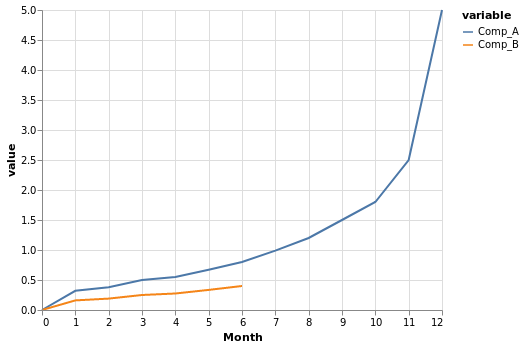

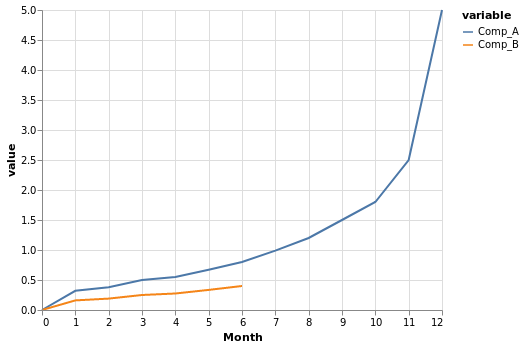

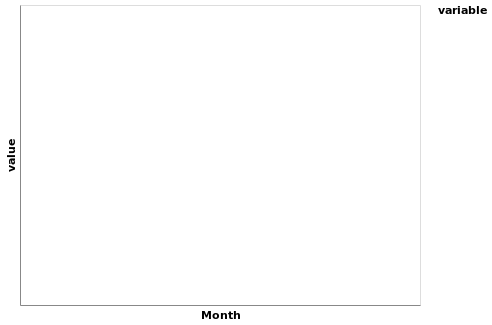

In [21]:
alt.Chart(df_long).mark_line().encode(
    x=alt.X('Month:Q'),
    y=alt.Y('value:Q'),
    color='variable',
    tooltip=['value', 'Month']
)

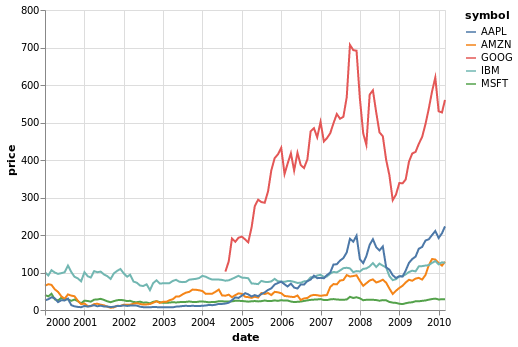

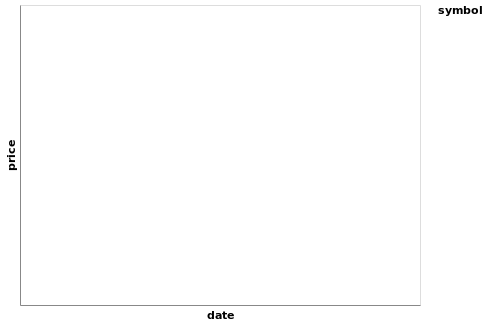

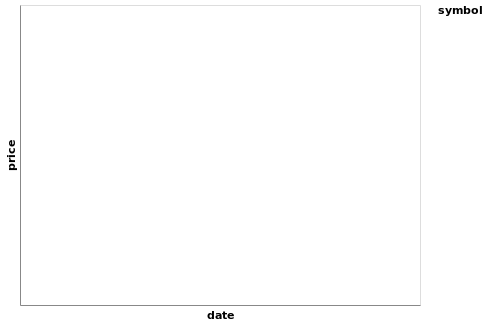

In [19]:
import altair as alt
from vega_datasets import data

stocks = data.stocks()

alt.Chart(stocks).mark_line().encode(
    x='date',
    y='price',
    color='symbol'
)

In [20]:
stocks.head()

,symbol,date,price
0,MSFT,2000-01-01,39.81
1,MSFT,2000-02-01,36.35
2,MSFT,2000-03-01,43.22
3,MSFT,2000-04-01,28.37
4,MSFT,2000-05-01,25.45
